## Importing libraries and files

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = r'/Users/helen/Airbnb Project'

In [5]:
listings_23 = pd.read_csv(os.path.join(path, '01 Data', 'Original Data', 'June 2023', 'june_23_listings_summary.csv'), index_col = False)

In [6]:
listings_24 = pd.read_csv(os.path.join(path, '01 Data', 'Original Data', 'March 2024', 'march_24_listings_summary.csv'), index_col = False)

In [7]:
reviews_23 = pd.read_csv(os.path.join(path, '01 Data', 'Original Data', 'June 2023', 'june_23_reviews_detailed.csv'), index_col = False)

In [8]:
reviews_24 = pd.read_csv(os.path.join(path, '01 Data', 'Original Data', 'March 2024', 'march_24_reviews_detailed.csv'), index_col = False)

## Data cleaning - listings

In [36]:
listings_23.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,44077,Bungalow in Churchtown · ★4.79 · 1 bedroom · 2...,193005,Teresa,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,78,3,295,1.98,2
1,85156,Bungalow in Churchtown · ★4.81 · 1 bedroom · 1...,193005,Teresa,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,79,3,248,1.69,2
2,159889,Home in Dublin · ★4.75 · 1 bedroom · 1 bed · 2...,766611,Marie,Dublin City,53.39027,-6.23547,Private room,50,3,390,2.85,3
3,162809,Townhouse in Dublin · ★4.84 · 2 bedrooms · 4 b...,777681,Robbie,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,79,1,344,3.52,2
4,165828,Rental unit in Dublin · ★4.64 · 1 bedroom · 3 ...,790601,Grainne,Dublin City,53.33744,-6.32363,Entire home/apt,378,5,75,0.53,5


In [57]:
#Removing unneccessary columns for efficiency/privacy reasons

listings_23 = listings_23.drop(columns = ['host_name'])

In [58]:
listings_24 = listings_24.drop(columns = ['host_name'])

In [59]:
#Checking data types

listings_23.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
dtype: object

In [60]:
listings_24.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
dtype: object

In [42]:
#Checking for missing values

listings_23.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
dtype: int64

In [43]:
listings_24.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            8
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3793
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
dtype: int64

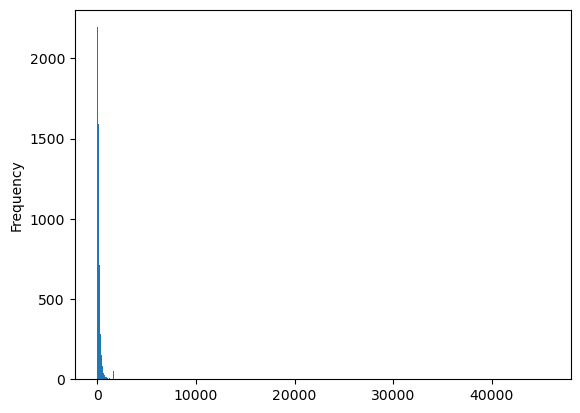

In [51]:
#42% of pricing information is missing from the listings_24 df. Checking for skew in data

skew_hist = listings_24['price'].plot.hist(bins = 500)

In [53]:
#The data is clearly skewed, therefore missing values should be calculated using the median value of this column. Imputing these missing values.

median_price_listings_24 = listings_24['price'].median()

In [54]:
listings_24['price'].fillna(median_price_listings_24, inplace=True)

In [61]:
#Checking that missing values have been imputed.

listings_24.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
dtype: int64

In [64]:
#Checking for duplicates in listings_23

listings_23_dupes = listings_23[listings_23.duplicated()]

In [63]:
listings_23_dupes

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count


In [65]:
listings_24_dupes = listings_24[listings_24.duplicated()]

In [66]:
listings_24_dupes

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count


In [67]:
#No duplicates found.

## Data cleaning - reviews

In [19]:
reviews_23.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


In [70]:
#Removing 'reviewer_name' column for data protection reasons.

reviews_23 = reviews_23.drop(columns = ['reviewer_name'])

In [71]:
reviews_24 = reviews_24.drop(columns = ['reviewer_name'])

In [72]:
#Checking data types

reviews_23.dtypes

listing_id      int64
id              int64
date           object
reviewer_id     int64
comments       object
dtype: object

In [73]:
reviews_24.dtypes

listing_id      int64
id              int64
date           object
reviewer_id     int64
comments       object
dtype: object

In [74]:
#Checking for missing values

reviews_23.isnull().sum()

listing_id      0
id              0
date            0
reviewer_id     0
comments       26
dtype: int64

In [76]:
#There are 26 observations that are missing 'comments'. As this is the key column neccessary in order to perform any sentiment or
#textual analysis, these 26 rows will be removed.

reviews_23.dropna(subset = ['comments'], inplace = True)

In [78]:
#Checking for missing values in reviews_24
reviews_24.isnull().sum()

listing_id      0
id              0
date            0
reviewer_id     0
comments       30
dtype: int64

In [79]:
#There are 30 observations that are missing 'comments'. As this is the key column neccessary in order to perform any sentiment or
#textual analysis, these 30 rows will be removed.

reviews_24.dropna(subset = ['comments'], inplace = True)

In [81]:
#Checking for duplicates in reviews_23

reviews_23_dupes = reviews_23[reviews_23.duplicated()]

In [82]:
reviews_23_dupes

,listing_id,id,date,reviewer_id,comments


In [83]:
#Checking for duplicates in reviews_24

reviews_24_dupes = reviews_24[reviews_24.duplicated()]

## Statistical analysis - listings

In [85]:
listings_23.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,8.440000e+03,8.440000e+03,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000
mean,2.733412e+17,1.395853e+08,53.345449,-6.255111,181.120498,6.184716,31.159005,5.366588
std,3.738527e+17,1.507540e+08,0.046388,0.062639,562.541185,29.167667,68.372446,12.511049
min,4.407700e+04,4.398400e+04,53.207663,-6.497588,9.000000,1.000000,0.000000,1.000000
25%,1.933922e+07,2.754379e+07,53.327961,-6.278417,70.000000,1.000000,1.000000,1.000000
50%,3.598778e+07,7.335573e+07,53.344160,-6.259215,115.000000,2.000000,6.000000,1.000000
75%,6.970116e+17,2.029741e+08,53.357097,-6.233293,200.000000,4.000000,27.000000,3.000000
max,9.101728e+17,5.191105e+08,53.623490,-6.052910,46513.000000,1125.000000,1218.000000,76.000000


In [86]:
listings_24.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,9.020000e+03,9.020000e+03,9020.000000,9020.000000,9020.000000,9020.000000,9020.000000,9020.000000
mean,3.534469e+17,1.541454e+08,53.345827,-6.255699,168.425831,6.250000,32.381596,6.209091
std,4.264895e+17,1.646165e+08,0.046197,0.063016,553.539762,30.776392,72.620441,14.600766
min,1.484200e+04,4.398400e+04,53.207663,-6.498946,15.000000,1.000000,0.000000,1.000000
25%,2.038340e+07,2.959183e+07,53.327808,-6.278165,110.000000,1.000000,1.000000,1.000000
50%,4.158785e+07,8.055937e+07,53.344154,-6.258841,124.000000,2.000000,6.000000,1.000000
75%,8.388324e+17,2.264616e+08,53.357780,-6.233503,140.000000,4.000000,28.000000,3.000000
max,1.045709e+18,5.504933e+08,53.623240,-6.051490,45703.000000,1125.000000,1466.000000,84.000000


## Exporting

In [88]:
listings_23.to_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'listings_23_clean.csv'))

In [89]:
listings_24.to_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'listings_24_clean.csv'))

In [90]:
reviews_23.to_csv(os.path.join(path, '01 Data','Prepared Data', 'June 2023', 'reviews_23_clean.csv'))

In [91]:
reviews_24.to_csv(os.path.join(path, '01 Data','Prepared Data', 'March 2024', 'reviews_24_clean.csv'))